counter =  6
 05 hours
file  data/urban_plume_0001_00000006.nc


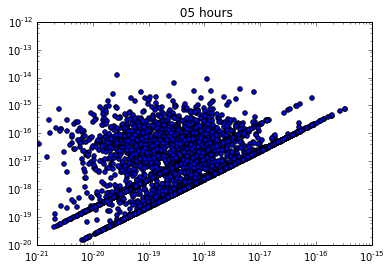

In [1]:
%matplotlib inline
import scipy.io
import sys
import numpy as np
import matplotlib
import os

import matplotlib.pyplot as plt
sys.path.append("../../tool")
import partmc3 as partmc

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.html.widgets.interaction import interact_manual

#def make_plot(in_dir, in_filename, title, out_filename):
def make_plot(in_dir, in_filename, title):
    print ('file ', in_dir+in_filename)
    
    ncf = scipy.io.netcdf.netcdf_file(in_dir+in_filename, 'r', mmap=False)
    particles= partmc.aero_particle_array_t(ncf)
    ncf.close()
    
    bc =  particles.masses(include = ["BC"])/particles.aero_data.molec_weights[0]
    oc =  particles.masses(include = ["OC"])/particles.aero_data.molec_weights[3] 
    no3 =  particles.masses(include = ["NO3"])/particles.aero_data.molec_weights[1]  

    plt.scatter(bc,oc)
    
    a = plt.gca() # gets the axis
    a.set_xscale("log") # x axis log
    a.set_yscale("log") # y axis log
    plt.axis([1e-21, 1e-15, 1e-20, 1e-12]) # axis limit

    plt.title(title)
    fig = plt.gcf()
    plt.show()

def setup_plot(counter):
    print ("counter = ", counter)
    
    in_dir = "data/"
    #in_filename = "urban_plume_4m_0001_000000%02d.nc" % counter
    in_filename = "urban_plume_0001_000000%02d.nc" % counter
    title = " %02d hours" % (counter-1)
    #out_filename = "figs/scatter_mass_%02d.pdf" % counter

    print (title)

    #make_plot(in_dir, in_filename, title, out_filename)
    make_plot(in_dir, in_filename, title)
    
interact_manual(setup_plot, counter=widgets.IntSlider(min=2,max=25,value=1))
